In [1]:
import h5py
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [181]:
# open HDF5 file

f1 = h5py.File("./cushion_twophase100x100x50v5.h5", 'r')
f2 = h5py.File("./cushion_twophase100x100x100v0.005.h5", 'r')
f3 = h5py.File("./cushion_twophase200x200x100v0.005.h5", 'r')
f4 = h5py.File("./cushion_twophase200x200x100v0.005.h5", 'r')
f5 = h5py.File("./cushion_twophase200x200x100v0.05.h5", 'r')
f6 = h5py.File("./cushion_twophase200x200x100v5.h5", 'r')
f7 = h5py.File("./cushion_twophase200x200x100v5000.h5", 'r')

f_all = [f1,f2,f3,f4,f5,f6,f7]

template_paths = [
    "Function/CS/{i}", "Function/FS/{i}", "Function/JS/{i}",
    "Function/KF/{i}", "Function/P_S/{i}", "Function/S_S/{i}", 
    "Function/T_S/{i}", "Function/eigS1_CS/{i}", "Function/eigS2_CS/{i}", 
    "Function/eigS3_CS/{i}", "Function/gradp/{i}", "Function/nS/{i}",
    "Function/p/{i}", "Function/rhoFR/{i}", "Function/uS/{i}",
    "Function/wFR/{i}"]


In [142]:
for idx, f_single in enumerate(f_all, start=1):
    for path in template_paths:
        key = path.format(i=1000)
        try:
            obj = f_single[key]
            print(f"f{idx}[\"{key}\"]: {obj}")
        except KeyError:
            print(f"Key '{key}' not found in f{idx}. Skipping.")


Key 'Function/CS/1000' not found in f1. Skipping.
Key 'Function/FS/1000' not found in f1. Skipping.
Key 'Function/JS/1000' not found in f1. Skipping.
Key 'Function/KF/1000' not found in f1. Skipping.
Key 'Function/P_S/1000' not found in f1. Skipping.
Key 'Function/S_S/1000' not found in f1. Skipping.
Key 'Function/T_S/1000' not found in f1. Skipping.
Key 'Function/eigS1_CS/1000' not found in f1. Skipping.
Key 'Function/eigS2_CS/1000' not found in f1. Skipping.
Key 'Function/eigS3_CS/1000' not found in f1. Skipping.
Key 'Function/gradp/1000' not found in f1. Skipping.
Key 'Function/nS/1000' not found in f1. Skipping.
Key 'Function/p/1000' not found in f1. Skipping.
Key 'Function/rhoFR/1000' not found in f1. Skipping.
Key 'Function/uS/1000' not found in f1. Skipping.
Key 'Function/wFR/1000' not found in f1. Skipping.
f2["Function/CS/1000"]: <HDF5 dataset "1000": shape (1183, 9), type "<f8">
f2["Function/FS/1000"]: <HDF5 dataset "1000": shape (1183, 9), type "<f8">
f2["Function/JS/1000"]:

In [185]:
# Call all dunction
def call_all(f):
    path_all = []
    def read_all(name, obj):
        if "Function" in name: #add mesh
            path_all.append(name)
    f.visititems(read_all)
    return path_all

#all files
for index, f in enumerate(f_all):
    print(f"File {index+1}:")
    
    path_all = call_all(f)
    
    for path in path_all:
        if path.count("/") < 2:
            continue

        matrix = f[path][()]
        print(f"path: f{index+1}[\"{path}\"], shape: {np.shape(matrix)}")
        print(np.array(matrix)[:1])
            

File 1:
path: f1["Function/CS/0_10000000000000001"], shape: (1183, 9)
[[ 1.00000000e+00  0.00000000e+00 -9.80116800e-11  0.00000000e+00
   1.00000000e+00 -9.80148792e-11 -9.80116800e-11 -9.80148792e-11
   1.00000000e+00]]
path: f1["Function/CS/0_20000000000000001"], shape: (1183, 9)
[[ 1.          0.         -0.01469482  0.          1.         -0.01469482
  -0.01469482 -0.01469482  0.91710684]]
path: f1["Function/CS/0_30000000000000004"], shape: (1183, 9)
[[ 1.          0.         -0.03029266  0.          1.         -0.03029266
  -0.03029266 -0.03029266  0.82712981]]
path: f1["Function/CS/0_40000000000000002"], shape: (1183, 9)
[[ 1.          0.         -0.04668002  0.          1.         -0.04668002
  -0.04668002 -0.04668002  0.73069713]]
path: f1["Function/CS/0_5"], shape: (1183, 9)
[[ 1.          0.         -0.0636408   0.          1.         -0.0636408
  -0.0636408  -0.0636408   0.62953698]]
path: f1["Function/CS/0_59999999999999998"], shape: (1183, 9)
[[ 1.          0.         -0.

In [134]:
obs = f4["Function/CS/1000"]
print(np.shape(obs))
print(np.array(obs)[:5])

(1183, 9)
[[ 1.00000000e+00  0.00000000e+00 -1.99945630e-02  0.00000000e+00
   1.00000000e+00 -1.99945630e-02 -1.99945630e-02 -1.99945630e-02
   7.88394760e-01]
 [ 1.00000000e+00  0.00000000e+00 -2.36314357e-02  0.00000000e+00
   1.00000000e+00 -2.23186346e-02 -2.36314357e-02 -2.23186346e-02
   8.41803177e-01]
 [ 1.00000000e+00  0.00000000e+00 -2.23186346e-02  0.00000000e+00
   1.00000000e+00 -2.36314357e-02 -2.23186346e-02 -2.36314357e-02
   8.41803177e-01]
 [ 1.00000000e+00  0.00000000e+00 -2.42007077e-02  0.00000000e+00
   1.00000000e+00 -2.42007077e-02 -2.42007077e-02 -2.42007077e-02
   9.02973246e-01]
 [ 1.00091617e+00  4.40345879e-04 -1.36549415e-03  4.40345879e-04
   1.00091617e+00 -1.36549412e-03 -1.36549415e-03 -1.36549412e-03
   9.25461471e-01]]


Geometry shape: (1183, 3)
Topology shape: (864, 8)


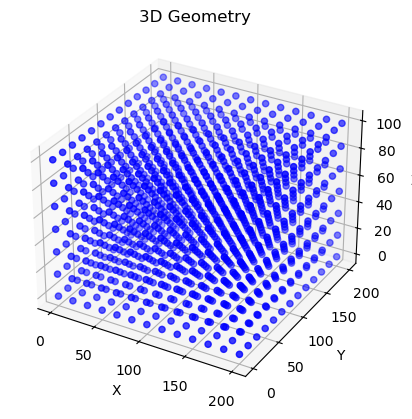

In [4]:
print("Geometry shape:", np.shape(f7["Mesh/mesh/geometry"]))
print("Topology shape:", np.shape(f7["Mesh/mesh/topology"]))

# Convert geometry to NumPy array
geometry = np.array(f7["Mesh/mesh/geometry"])

# Plot as 3D point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(geometry[:, 0], geometry[:, 1], geometry[:, 2], c='b', marker='o')
ax.set_title('3D Geometry')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [5]:
def call_gradp(f):
    gradp_path = []
    def filter_gradp(name, obj):
        if "gradp" in name and "eig" not in name: #Filter paths with "CS"
            gradp_path.append(name)
    f.visititems(filter_gradp)
    return gradp_path

#all files
for i, f in enumerate(f_all):
    print(f"File {i+1}:")
    gradp_path = call_gradp(f)
    for path in gradp_path:
        #print(path)

File 1:
Function/gradp
Function/gradp/0_10000000000000001
Function/gradp/0_20000000000000001
Function/gradp/0_30000000000000004
Function/gradp/0_40000000000000002
Function/gradp/0_5
Function/gradp/0_59999999999999998
Function/gradp/0_69999999999999996
Function/gradp/0_79999999999999993
Function/gradp/0_89999999999999991
Function/gradp/0_99999999999999989
Function/gradp/1_0999999999999999
Function/gradp/1_2
Function/gradp/1_3
Function/gradp/1_4000000000000001
Function/gradp/1_5000000000000002
Function/gradp/1_6000000000000003
Function/gradp/1_7000000000000004
Function/gradp/1_8000000000000005
Function/gradp/1_9000000000000006
Function/gradp/2_0000000000000004
Function/gradp/2_1000000000000005
Function/gradp/2_2000000000000006
Function/gradp/2_3000000000000007
Function/gradp/2_4000000000000008
Function/gradp/2_5000000000000009
Function/gradp/2_600000000000001
Function/gradp/2_7000000000000011
Function/gradp/2_8000000000000012
Function/gradp/2_9000000000000012
Function/gradp/3_00000000000

In [6]:
#Label


In [7]:
#Read Fs – Deformation gradient of solid structure
data_timestep = []

key = list(f4["Function/FS"].keys())

#iterate all time steps
for path in key:
    data_path = f"Function/FS/{path}"
    if data_path in f4:
        data = np.array(f1[data_path]) #convert to NumPy
        data_timestep.append(data) #add to list
        #print(data_path) #extract just FS
       
data_array = np.stack(data_timestep)
print("Combined data shape:", np.shape(data_array))
print("Combined data:", np.array(data_array)[:3])

KeyError: "Unable to open object (object '1000' doesn't exist)"

In [ ]:
plot_first = data_array[0]
plot_last = data_array[len(key)-1]

print("Shape of array element:", np.shape(plot_first))

plt.title("compare Fs – Deformation gradient of solid structure")
plt.imshow(plot_first, aspect='auto', cmap='viridis')
plt.colorbar()
plt.show()
plt.imshow(plot_last, aspect='auto', cmap='viridis')
plt.colorbar()
plt.show()

In [ ]:
# Sequential Split (80-20)
data_array = np.nan_to_num(data_array, nan=0.0)
split = int(0.8*len(data_array))
train, test = data_array[:split], data_array[split:]

t_train = np.arange(len(train))
t_test = np.arange(len(test))

print('Shapes of arrays')
print("Train shape:", np.shape(train))
print("Test shape:", np.shape(test))

print('\nLables: ', np.unique(t_train))

print('\nmin - max train: ', np.min(train), np.max(train))
print("min - max test: ", np.min(test), np.max(test))

# normalize to [0,1]
x_train = (train-np.min(train)) / (np.max(train)-np.min(train))
x_test = (test-np.min(test)) / (np.max(test)-np.min(test))

print("train:", x_train[:2])
print("test:", x_test[:2])

In [ ]:
#model_1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(1183,9)),tf.keras.layers.Dense(128, activation ='relu'),tf.keras.layers.Dense(24, activation ='softmax')])

model_2 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(1183,9,1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(24, activation="softmax"),
])

model_2.summary()

# compile the model, set optimizer, loss and metric functions
#model_1.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy']) 

model_2.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

#model_1.fit(train, t_train, epochs = 5);
hist = model_2.fit(train, t_train, epochs = 100);

In [ ]:
# evaluate the accuracy
#loss_1, accuracy_1 = model_1.evaluate(test, t_test, verbose=0);
loss_2, accuracy_2 = model_2.evaluate(test, t_test, verbose=0);

#print('loss_1=', loss_1)
#print('accuracy_1=', accuracy_1)

print('loss_2=', loss_2)
print('accuracy_2=', accuracy_2)

plt.plot(hist.history['loss'])

In [ ]:
# Show the predictions for the test set
#predictions_1 = model_1.predict(x_test[0:3])

#print(np.round(predictions_1[2],6))
#print(predictions_1.shape)
# show the image
#for i in range(3):
#    plt.imshow(test[i])
#    # Get the label with the highest prediction value
#   print('Label = ', np.argmax(predictions_1[i]))
#    plt.show()

# Show the predictions for the test set
predictions_2 = model_2.predict(x_test[0:3])

print(np.round(predictions_2[2],6))
print(predictions_2.shape)
# show the image
for i in range(3):
    plt.imshow(test[i])
    # Get the label with the highest prediction value
    print('Label = ', np.argmax(predictions_2[i]))
    plt.show()